## Part 1: Preprocessing 

**Importing the libraries and dataset**

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [181]:
dataset = pd.read_csv('breast-cancer.csv')

In [182]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Data Exploration**

In [183]:
dataset.shape

(569, 32)

In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [185]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [186]:
len(dataset.select_dtypes(include='object').columns)

1

In [187]:
dataset.select_dtypes(include=['float64','int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [188]:
len(dataset.select_dtypes(include=['float64','int64']).columns)

31

In [189]:
# statistical summary
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [190]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**Dealing with missing values**

In [191]:
dataset.isnull().values.any()

False

**Dealing with categorical data**

In [192]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [193]:
dataset.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [194]:
dataset.diagnosis.nunique()

2

In [195]:
dataset = pd.get_dummies(dataset,drop_first=True)

In [196]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


**Countplot**

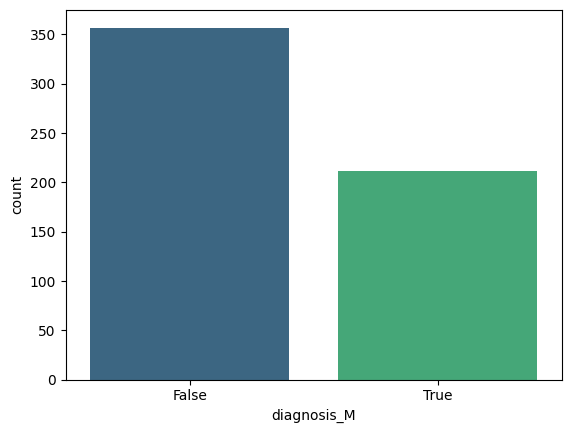

In [197]:
sns.countplot(x=dataset['diagnosis_M'],palette='viridis')
plt.xlabel('diagnosis_M')
plt.show()

In [198]:
# True== Malignant
# False == Benign
dataset['diagnosis_M'].value_counts()

diagnosis_M
False    357
True     212
Name: count, dtype: int64

**Correlation matrix and heatmap**

In [199]:
correlation = dataset.drop(['diagnosis_M'],axis=1).corrwith(dataset['diagnosis_M'])

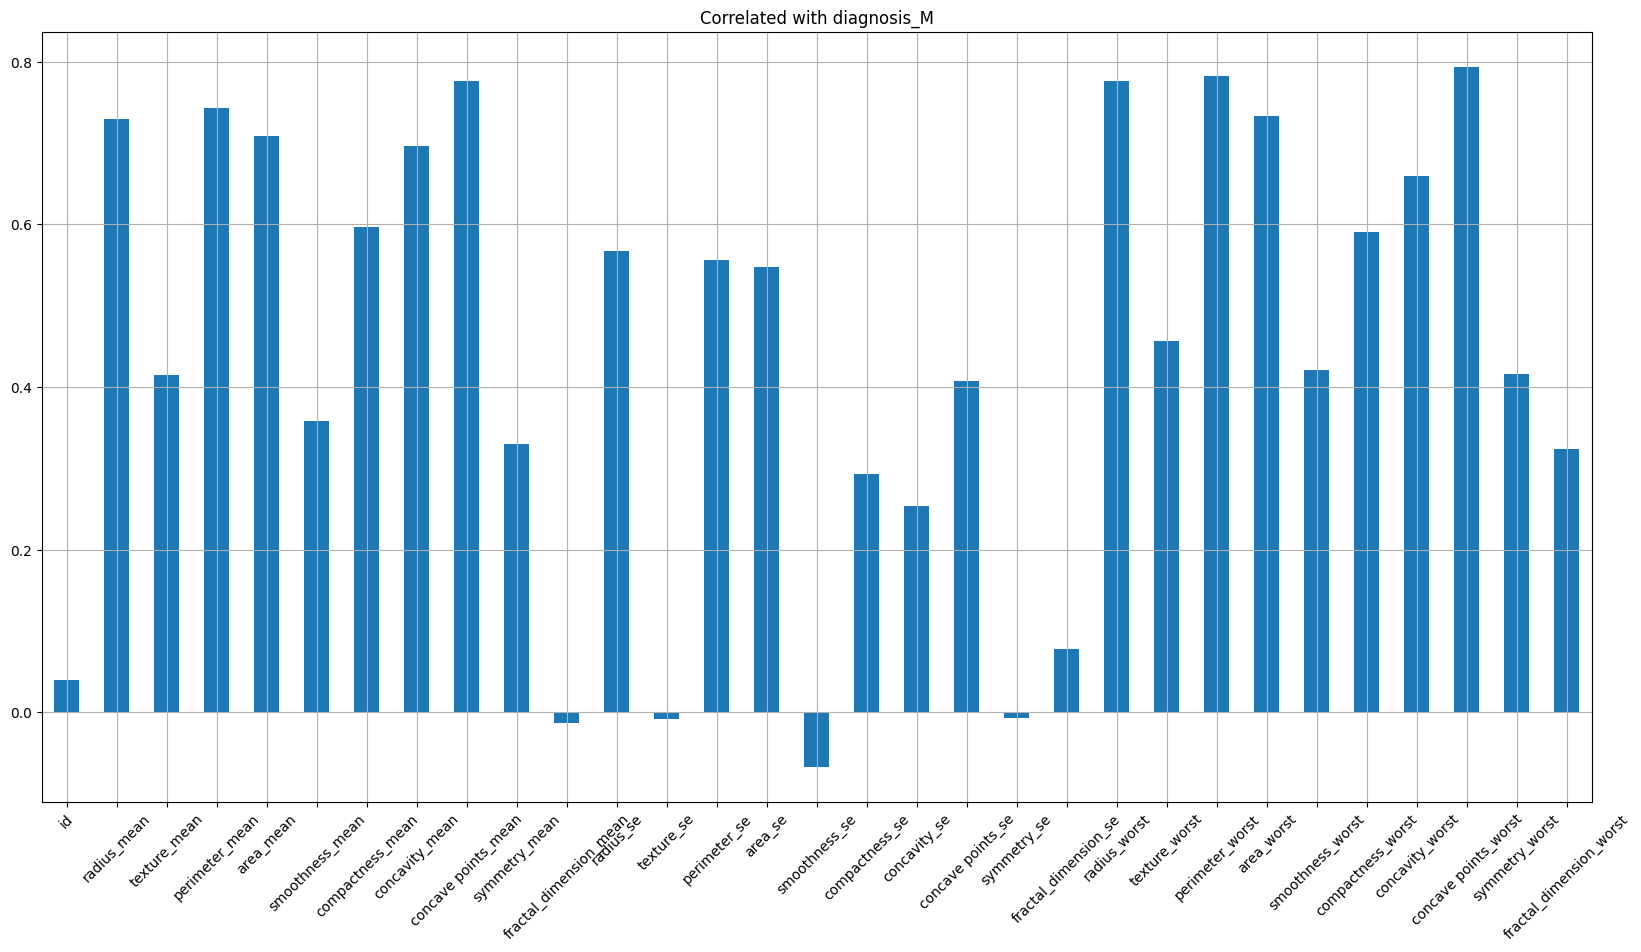

In [200]:
plt.figure(figsize=(20,10))
correlation.plot(kind='bar',rot=45)
plt.title('Correlated with diagnosis_M')
plt.grid(True);

**Correlation Matrix**

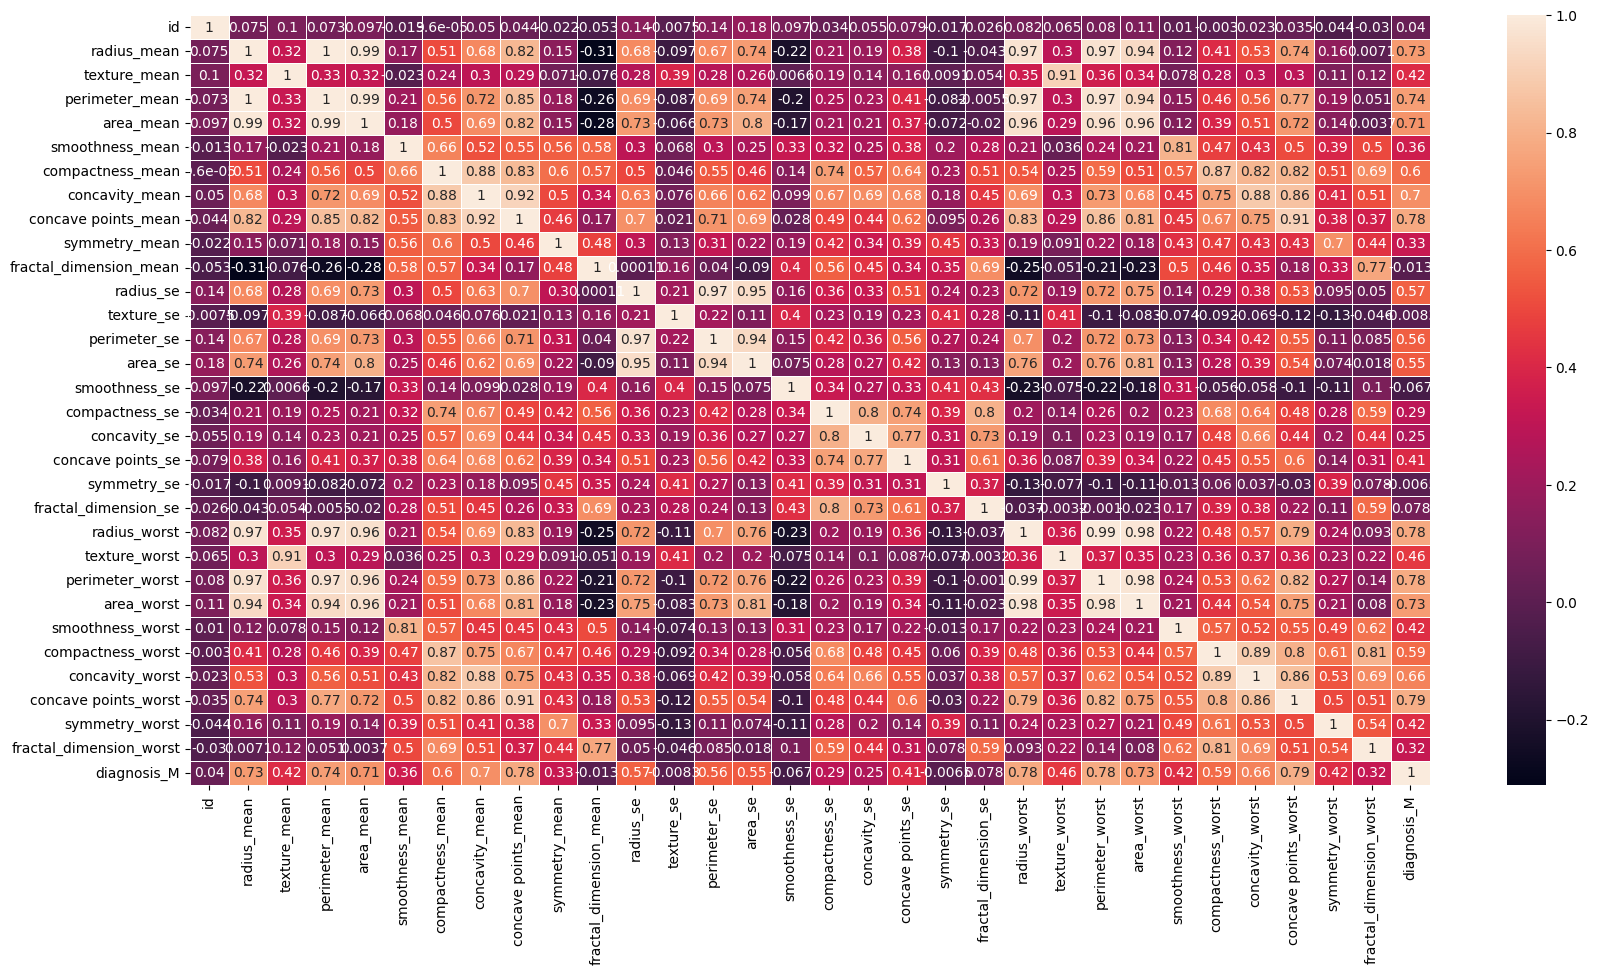

In [201]:
plt.figure(figsize=(20,10))
corr= dataset.corr()
sns.heatmap(corr,annot=True,lw=.5);


**Splitting the dataset into train and test set**

In [202]:
# matrix of features
X = dataset.iloc[:,1:-1].values

In [203]:
X.shape

(569, 30)

In [204]:
# dependent variable of features
y= dataset.iloc[:,-1].values

In [205]:
y.shape

(569,)

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [207]:
X_train.shape

(455, 30)

In [208]:
X_test.shape

(114, 30)

In [209]:
y_train.shape

(455,)

In [210]:
y_test.shape

(114,)

**Feature Scaling**

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2: Building the Model

### 1). Logistic Regression

In [213]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train,y_train)

LogisticRegression()

In [214]:
y_pred = classifier_lr.predict(X_test)

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [216]:
prec = precision_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf= confusion_matrix(y_test,y_pred)

In [217]:
results = pd.DataFrame(['Logistic Regression', prec, acc,rec,f1],index=['Model','Precison Score','Accuracy score','Recall Score','F1 Score'])
results.T

,Model,Precison Score,Accuracy score,Recall Score,F1 Score
0,Logistic Regression,0.957447,0.964912,0.957447,0.957447


In [218]:
print(conf)

[[65  2]
 [ 2 45]]


**Cross Validation**

In [219]:
from sklearn.model_selection import cross_val_score

In [220]:
accuracies = cross_val_score(estimator=LogisticRegression(),X=X_train, y=y_train,scoring='accuracy',cv=10)

In [221]:
print('Accuracy is: {:.2f} %'.format(np.mean(accuracies)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracies)))

Accuracy is: 97.81 %
Standard Deviation is: 0.02


### 2). Random Forest Classifier

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
classifier_rfc = RandomForestClassifier()
classifier_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [224]:
y_pred = classifier_rfc.predict(X_test)

In [225]:
prec = precision_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf= confusion_matrix(y_test,y_pred)

In [226]:
model_result = pd.DataFrame(['Random Forest Classifier', prec, acc,rec,f1],index=['Model','Precison Score','Accuracy score','Recall Score','F1 Score'])


In [227]:
results = pd.concat([results,model_result],axis=1)
results.T.reset_index(drop=True)

,Model,Precison Score,Accuracy score,Recall Score,F1 Score
0,Logistic Regression,0.957447,0.964912,0.957447,0.957447
1,Random Forest Classifier,0.93617,0.947368,0.93617,0.93617


In [228]:
print(conf)

[[64  3]
 [ 3 44]]


**Cross Validation**

In [229]:
accuracies = cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train,scoring='accuracy',cv=10)

In [230]:
print('Accuracy is: {:.2f} %'.format(np.mean(accuracies)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracies)))

Accuracy is: 95.83 %
Standard Deviation is: 0.03


## 3). Support Vector Machine

In [231]:
from sklearn.svm import SVC

In [232]:
classifier_svc = SVC(kernel='rbf')
classifier_svc.fit(X_train,y_train)

SVC()

In [233]:
y_pred = classifier_svc.predict(X_test)

In [234]:
prec = precision_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf= confusion_matrix(y_test,y_pred)

In [235]:
model_result1 = pd.DataFrame(['Support Vector Machine', prec, acc,rec,f1],index=['Model','Precison Score','Accuracy score','Recall Score','F1 Score'])


In [236]:
results = pd.concat([results,model_result1],axis=1)
results.T.reset_index(drop=True)

,Model,Precison Score,Accuracy score,Recall Score,F1 Score
0,Logistic Regression,0.957447,0.964912,0.957447,0.957447
1,Random Forest Classifier,0.93617,0.947368,0.93617,0.93617
2,Support Vector Machine,1.0,0.982456,0.957447,0.978261


In [237]:
print(conf)

[[67  0]
 [ 2 45]]


**Cross Validation**

In [238]:
accuracies = cross_val_score(estimator=SVC(),X=X_train, y=y_train,scoring='accuracy',cv=10)
print('Accuracy is: {:.2f} %'.format(np.mean(accuracies)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracies)))

Accuracy is: 97.59 %
Standard Deviation is: 0.02


### 4). XGBOOST

In [239]:
import xgboost as xgb
classifier_xgb = xgb.XGBClassifier()
classifier_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [240]:
y_pred = classifier_xgb.predict(X_test)

In [241]:
prec = precision_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf= confusion_matrix(y_test,y_pred)

In [242]:
model_result2 = pd.DataFrame(['XGBoost Classifier', prec, acc,rec,f1],index=['Model','Precison Score','Accuracy score','Recall Score','F1 Score'])


In [243]:
results = pd.concat([results,model_result2],axis=1)
results.T.reset_index(drop=True)

,Model,Precison Score,Accuracy score,Recall Score,F1 Score
0,Logistic Regression,0.957447,0.964912,0.957447,0.957447
1,Random Forest Classifier,0.93617,0.947368,0.93617,0.93617
2,Support Vector Machine,1.0,0.982456,0.957447,0.978261
3,XGBoost Classifier,0.9375,0.95614,0.957447,0.947368


**Cross Validation**

In [244]:
accuracies = cross_val_score(estimator=classifier_xgb,X=X_train, y=y_train,scoring='accuracy',cv=10)
print('Accuracy is: {:.2f} %'.format(np.mean(accuracies)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracies)))

Accuracy is: 96.93 %
Standard Deviation is: 0.02


## 5). Randomized Search to find the best hyperparameter (Logistic Regression)

In [245]:
from sklearn.model_selection import RandomizedSearchCV

In [246]:
lr_rscv = LogisticRegression()
parameter = { 'penalty':['l1', 'l2', 'elasticnet', None],
    'C':[.25,.5,.75,1,1.25,1.5,1.75,2.0],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']   
}

In [247]:
random_search = RandomizedSearchCV(estimator=lr_rscv, param_distributions=parameter,cv =10, n_iter=10,scoring='accuracy',n_jobs=-1,verbose=3)

In [248]:
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy', verbose=3)

In [249]:
random_search.best_estimator_

LogisticRegression(C=0.5, solver='saga')

In [250]:
random_search.best_score_

0.9824154589371981

In [251]:
random_search.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.5}

### Part 5: Final Models

In [252]:
classifier = LogisticRegression(C=1.25, solver='newton-cholesky')
classifier.fit(X_train,y_train)

LogisticRegression(C=1.25, solver='newton-cholesky')

In [253]:
y_pred = classifier.predict(X_test)

In [254]:
prec = precision_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf= confusion_matrix(y_test,y_pred)

In [255]:
model_result3 = pd.DataFrame(['Final LogisticRegression', prec, acc,rec,f1],index=['Model','Precison Score','Accuracy score','Recall Score','F1 Score'])
results = pd.concat([results,model_result3],axis=1)
results.T.reset_index(drop=True)

,Model,Precison Score,Accuracy score,Recall Score,F1 Score
0,Logistic Regression,0.957447,0.964912,0.957447,0.957447
1,Random Forest Classifier,0.93617,0.947368,0.93617,0.93617
2,Support Vector Machine,1.0,0.982456,0.957447,0.978261
3,XGBoost Classifier,0.9375,0.95614,0.957447,0.947368
4,Final LogisticRegression,0.957447,0.964912,0.957447,0.957447


**Cross Validation**

In [256]:
accuracies = cross_val_score(estimator=LogisticRegression(C=1, solver='saga'),X=X_train, y=y_train,scoring='accuracy',cv=10)
print('Accuracy is: {:.2f} %'.format(np.mean(accuracies)*100))
print('Standard Deviation is: {:.2f}'.format(np.std(accuracies)))

Accuracy is: 98.24 %
Standard Deviation is: 0.02


## Part 5: Predicting a single variable

In [257]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


In [261]:
single_obs = dataset.iloc[0,1:-1].values

(30,)

In [264]:
single_obs = single_obs.reshape(1,-1)

In [268]:
print(classifier.predict(sc.transform(single_obs),)[0])

True
